In [62]:
%matplotlib inline
import pandas as pd
import numpy as np

## 数据可视化
Pandas 的数据可视化使用 matplotlib 为基础组件。更基础的信息可参阅 matplotlib 相关内容。本节主要介绍 Pandas 里提供的比 matplotlib 更便捷的数据可视化操作。



### 线型图
Series 和 DataFrame 都提供了一个 `plot` 的函数。可以直接画出线形图。

In [22]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2020',periods=1000))
ts = ts.cumsum()
ts

2020-01-01    -1.007359
2020-01-02    -1.396870
2020-01-03    -0.571673
2020-01-04    -1.238321
2020-01-05    -1.902787
                ...    
2022-09-22   -23.065485
2022-09-23   -22.966611
2022-09-24   -23.469848
2022-09-25   -21.643868
2022-09-26   -22.333032
Freq: D, Length: 1000, dtype: float64

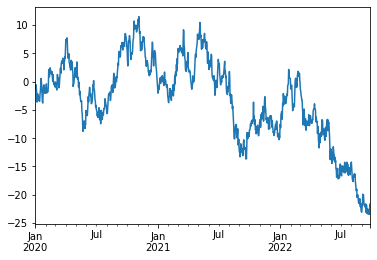

In [24]:
ts.plot()
# ts.plot(); 加分号看不到图片上面类的描述文字

In [25]:
ts = ts.describe()
ts

count    1000.000000
mean       -3.259263
std         7.471868
min       -23.469848
25%        -7.613153
50%        -2.045818
75%         1.861082
max        11.462306
dtype: float64

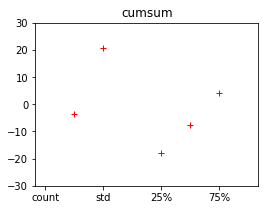

In [16]:
# ts.plot? for more help
ts.plot(title='cumsum',style='r+',ylim=[-30,30],figsize=[4,3])
# style:color; +点图 -实线 --虚线

In [17]:
ts.plot?

In [29]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2020',periods=1000))
ts = ts.cumsum()
ts

2020-01-01    -0.706486
2020-01-02    -0.503854
2020-01-03    -0.855278
2020-01-04    -0.990032
2020-01-05    -3.288336
                ...    
2022-09-22    10.765014
2022-09-23    12.429010
2022-09-24    12.075903
2022-09-25    11.248809
2022-09-26    12.077103
Freq: D, Length: 1000, dtype: float64

In [32]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=list('ABCD'))
df.describe()

<bound method NDFrame.describe of                    A         B         C         D
2020-01-01 -0.249352 -0.364688  1.678199  0.266928
2020-01-02  0.593310  2.303187  2.070464  0.060618
2020-01-03 -0.127710 -0.433654  0.338813 -0.213434
2020-01-04  0.344427  0.354582  1.633006 -0.547345
2020-01-05 -0.972258 -0.061491  0.691612  0.912244
...              ...       ...       ...       ...
2022-09-22 -0.280950  0.206524 -0.933028 -0.351391
2022-09-23  0.818245  1.058787  0.926460 -1.278607
2022-09-24  1.313235 -0.481025 -0.351714  0.846237
2022-09-25  0.945414  1.460579 -0.118780  0.627762
2022-09-26  1.152482 -0.513103  0.800780  1.090994

[1000 rows x 4 columns]>

In [34]:
df = df.cumsum()
df

,A,B,C,D
2020-01-01,-0.249352,-0.364688,1.678199,0.266928
2020-01-02,0.094606,1.573811,5.426862,0.594474
2020-01-03,0.310854,3.078656,9.514338,0.708586
2020-01-04,0.871529,4.938084,15.234819,0.275354
2020-01-05,0.459946,6.736020,21.646912,0.754365
...,...,...,...,...
2022-09-22,-3614.807276,6357.433083,34581.647154,8891.026022
2022-09-23,-3641.569232,6398.173246,34601.224672,8875.288746
2022-09-24,-3667.017952,6438.432383,34620.450476,8860.397708
2022-09-25,-3691.521259,6480.152099,34639.557500,8846.134433


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c2f6d10>,
      dtype=object)

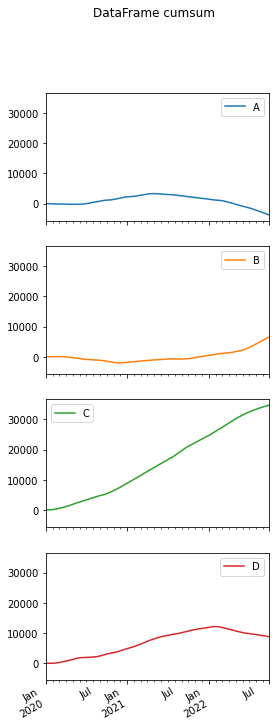

In [35]:
df.plot(title='DataFrame cumsum',figsize=(4,12),subplots=True,sharex=True,sharey=True)

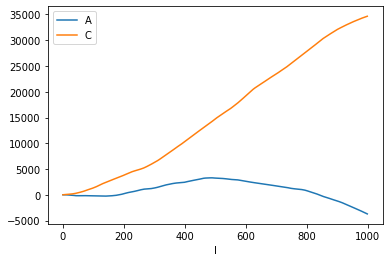

In [36]:
df['I'] = np.arange(len(df))
df.plot(x='I',y=['A','C'])

### 柱状图

In [37]:
df = pd.DataFrame(np.random.rand(10,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,0.144936,0.319952,0.925013,0.664888
1,0.242825,0.927957,0.259851,0.603327
2,0.485169,0.821778,0.099577,0.916326
3,0.928467,0.476428,0.865164,0.787890
4,0.868555,0.844888,0.809424,0.956592
5,0.829830,0.880612,0.127630,0.058785
6,0.094262,0.922369,0.171453,0.770384
7,0.820663,0.117296,0.517740,0.268059
8,0.941055,0.140278,0.383871,0.643780
9,0.311016,0.891811,0.602570,0.481553


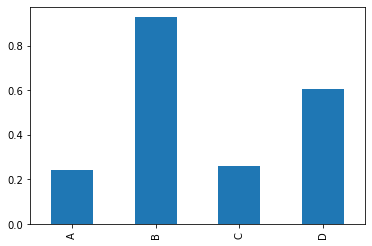

In [38]:
# df.ix[1].plot(kind='bar') invalid
df.iloc[1].plot(kind='bar')

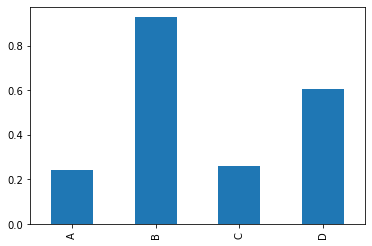

In [39]:
df.iloc[1].plot.bar()

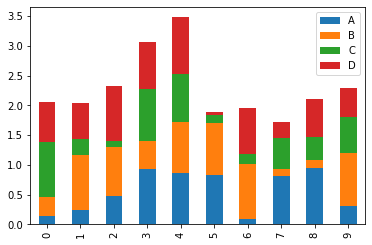

In [40]:
df.plot.bar(stacked=True)

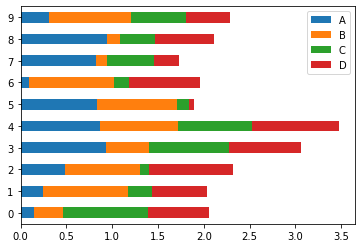

In [41]:
df.plot.barh(stacked=True)

### 直方图
直方图是一种对值频率进行离散化的柱状图。数据点被分到离散的，间隔均匀的区间中，绘制各个区间中数据点的数据。

In [42]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df

,a,b,c
0,0.467376,-0.763475,-1.747488
1,2.679298,-0.393101,-0.155596
2,1.367798,0.541759,0.095785
3,0.073709,0.075385,-0.048736
4,0.028333,1.360157,-0.857950
...,...,...,...
995,1.985423,0.004909,-0.027573
996,0.957488,-1.193179,-0.470138
997,-0.286061,0.555952,-1.169519
998,0.154370,-0.998357,-1.389981


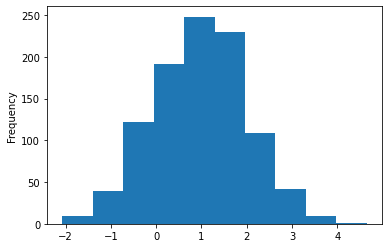

In [43]:
df['a'].plot.hist(bins=10)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d36c710>,
      dtype=object)

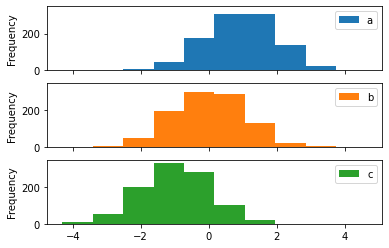

In [51]:
df.plot.hist(subplots=True,sharex=True,sharey=True)


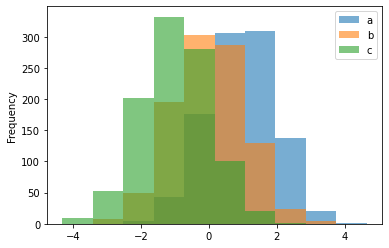

In [47]:
# alpha clarity
df.plot.hist(alpha=0.6)

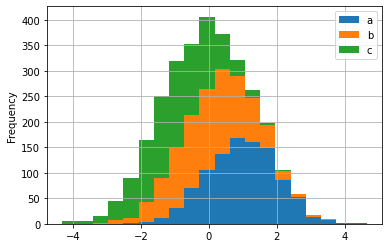

In [52]:
# grid 格子
df.plot.hist(stacked=True,bins=20,grid=True)

### 密度图

正态分布（高斯分布）就是一种自然界中广泛存在密度图。比如我们的身高，我们的财富，我们的智商都符合高斯分布。

In [58]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df

,a,b,c
0,1.392564,-0.108702,-1.495464
1,1.714722,-0.511252,-1.715563
2,0.807809,-1.589692,-1.977687
3,2.867749,-1.231232,-0.654436
4,1.687324,0.345677,-2.478233
...,...,...,...
995,1.273450,0.971850,-0.474902
996,-1.142945,0.382595,-0.360334
997,1.723284,0.122891,-0.057781
998,0.232460,-2.289715,-1.304629


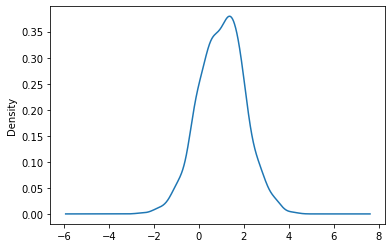

In [64]:
df['a'].plot.kde()

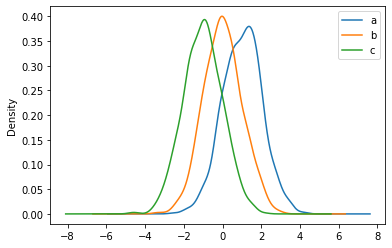

In [65]:
df.plot.kde()

In [66]:
df.mean()

a    1.015528
b    0.013296
c   -1.010011
dtype: float64

In [67]:
df.std()

a    1.008763
b    0.993907
c    1.003828
dtype: float64

### 带密度估计的规格化直方图

In [71]:
n1 = np.random.normal(0, 1, size=200) # N(0, 1)
n2 = np.random.normal(10, 2, size=200) # N(10, 4)
s = pd.Series(np.concatenate([n1,n2]))
s.describe()

count    400.000000
mean       5.015084
std        5.328790
min       -2.423313
25%       -0.075415
50%        3.445890
75%        9.922639
max       15.840508
dtype: float64

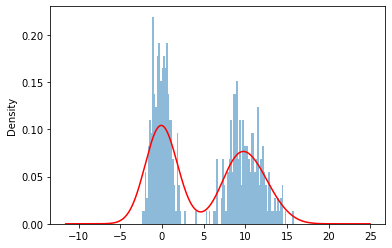

In [93]:
# s.plot.hist(bins=100,alpha=0.5,normed=True)
s.plot.hist(bins=100,alpha=0.5,density=True)
s.plot.kde(style='r-')

### 散布图
散布图是把所有的点画在同一个坐标轴上的图像。是观察两个一维数据之间关系的有效的手段。

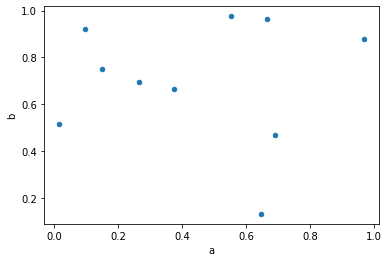

In [96]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a',y='b')

In [98]:
df = pd.DataFrame({'a': np.concatenate([np.random.normal(0, 1, 200), np.random.normal(6, 1, 200)]),
                  'b': np.concatenate([np.random.normal(10, 2, 200), np.random.normal(0, 2, 200)]),
                  'c': np.concatenate([np.random.normal(10, 4, 200), np.random.normal(0, 4, 200)])})
df.describe()


,a,b,c
count,400.000000,400.000000,400.000000
mean,3.045241,4.787081,4.710561
std,3.088064,5.400461,6.416004
min,-2.107863,-5.150321,-12.642277
25%,0.144942,-0.291516,-0.555885
50%,3.452985,4.740946,4.658963
75%,5.964217,9.818024,10.106444
max,8.198460,15.833876,18.658186


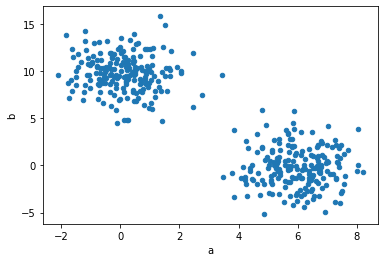

In [99]:
df.plot.scatter(x='a',y='b')

### 饼图

In [100]:
s = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
s


a    2.898536
b    1.530699
c    0.812281
d    2.495278
Name: series, dtype: float64

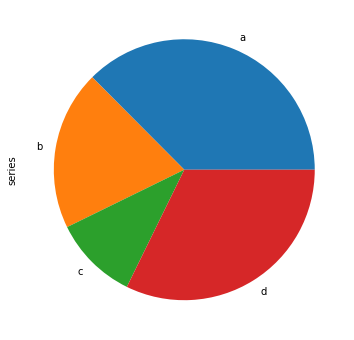

In [101]:
s.plot.pie(figsize=(6,6))

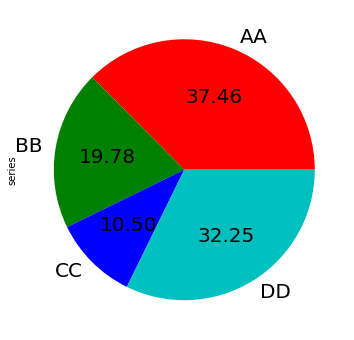

In [102]:
s.plot.pie(labels=['AA','BB','CC','DD'],colors=['r','g','b','c'],
           autopct='%.2f',fontsize=20,figsize=(6,6))

In [106]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df

,x,y
a,0.062283,2.638293
b,1.985702,0.984002
c,0.365123,2.657574
d,0.984211,0.028633


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f5a9810>,
      dtype=object)

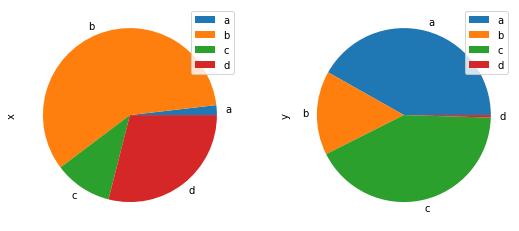

In [107]:
df.plot.pie(subplots=True,figsize=(9,4))

### 高级绘图
高级绘图函数在 pandas.tools.plotting 包里(old)
(new position) pandas.plotting

In [125]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000,5),columns=['a', 'b', 'c', 'd','e'])
# df = df.cumsum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13aec4fd0>,
      dtype=object)

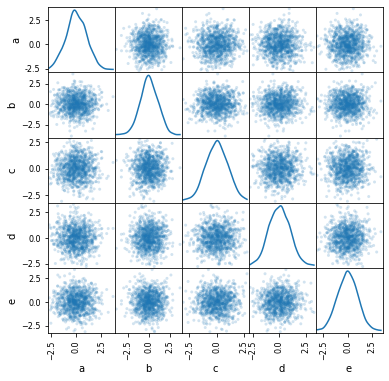

In [126]:
# 正态
scatter_matrix(df,alpha=0.2,figsize=(6,6),diagonal='kde')

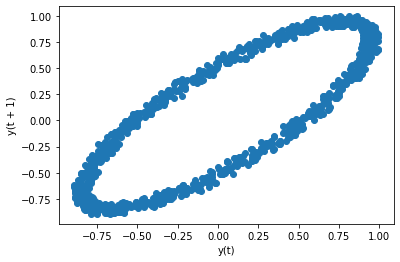

In [155]:
from pandas.plotting import lag_plot
s = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99*np.pi,99*np.pi,num=1000)))
lag_plot(s)

In [1]:
from pandas.plotting import autocorrelation_plot

s = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(s);

NameError: name 'pd' is not defined